In [1]:
populations = {
    'Kingston upon Thames': 168063,
    'Bexley': 246472,
    'Sutton': 209639,
    'Westminster': 204236,
    'Kensington and Chelsea': 143375,
    'Hackney': 259146,
    'Lewisham': 300553,
    'Haringey': 264238,
    'Islington': 216589,
    'Lambeth': 318654
}

In [2]:
import pandas as pd
import numpy as np
import datetime

df_homicide = pd.read_csv('..\data\Homicides_2003_2023.csv')

df_homicide['Month'] = df_homicide['Recorded Date'].str.split('-').str[0]
df_homicide['Year'] = '20' + df_homicide['Recorded Date'].str.split('-').str[1]
df_homicide['Year'] = df_homicide['Year'].astype(int)

month_to_number = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df_homicide['Month'] = df_homicide['Month'].map(month_to_number)

df_homicide.drop('Recorded Date', axis=1, inplace=True)

best_boroughs = [
    'Kingston upon Thames', 'Bexley', 'Sutton',
    'Westminster', 'Kensington and Chelsea'
]
worst_boroughs = [
    'Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth'
]

df_homicide['Borough'] = df_homicide['Borough'].replace('Kingston Upon Thames', 'Kingston upon Thames')
df_homicide['Borough'] = df_homicide['Borough'].replace('Kensington & Chelsea', 'Kensington and Chelsea')

df_homicide_best = df_homicide[df_homicide['Borough'].isin(best_boroughs)]
df_homicide_worst = df_homicide[df_homicide['Borough'].isin(worst_boroughs)]

df_homicide_best

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\G2MIC\AppData\Local\Temp\ipykernel_10328\2024833439.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_homicide = pd.read_csv('..\data\Homicides_2003_2023.csv')


,Count of Victims,Age Group,Sex,Method of Killing,Domestic Abuse,Homicide Offence Type,Solved Status,Borough,Officer Observed Ethnicity,Month,Year
3,1,45 to 54,Male,Blunt Implement,Not Domestic Abuse,Murder,Solved,Kingston upon Thames,White,9,2003
42,1,35 to 44,Female,Knife or Sharp Implement,Domestic Abuse,Murder,Solved,Westminster,White,8,2003
127,1,25 to 34,Female,Shooting,Not Domestic Abuse,Murder,Solved,Bexley,Asian,3,2003
128,1,0 to 12,Male,Other Methods of Killing,Not Domestic Abuse,Murder,Solved,Sutton,White,12,2003
202,1,65 and over,Female,Blunt Implement,Not Domestic Abuse,Murder,Solved,Westminster,White,1,2003
...,...,...,...,...,...,...,...,...,...,...,...
2887,1,0 to 12,Male,Not known/Not Recorded,Not Domestic Abuse,Manslaughter,Solved,Sutton,Black,11,2023
2888,1,13 to19,Male,Knife or Sharp Implement,Not Domestic Abuse,Murder,Unsolved,Sutton,Asian,12,2023
2908,1,35 to 44,Male,Knife or Sharp Implement,Not Domestic Abuse,Murder,Solved,Kensington and Chelsea,Black,10,2023
2910,1,25 to 34,Male,Knife or Sharp Implement,Not Domestic Abuse,Murder,Unsolved,Westminster,Asian,3,2023


In [3]:
df_homicide_best_grouped = df_homicide_best.groupby(['Borough', 'Year']).size().reset_index(name='Count')
df_homicide_worst_grouped = df_homicide_worst.groupby(['Borough', 'Year']).size().reset_index(name='Count')

df_homicide_best_grouped

,Borough,Year,Count
0,Bexley,2003,1
1,Bexley,2004,2
2,Bexley,2005,2
3,Bexley,2006,3
4,Bexley,2007,1
...,...,...,...
80,Westminster,2019,4
81,Westminster,2020,5
82,Westminster,2021,5
83,Westminster,2022,6


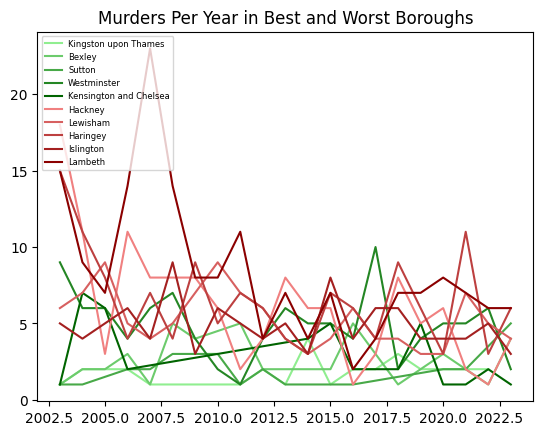

In [4]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Define colormaps for best and worst boroughs
cmap_best = mcolors.LinearSegmentedColormap.from_list("", ["lightgreen", "darkgreen"])
cmap_worst = mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"])

# Generate the colors for the boroughs
best_colors = [cmap_best(i / (len(best_boroughs) - 1)) for i in range(len(best_boroughs))]
worst_colors = [cmap_worst(i / (len(worst_boroughs) - 1)) for i in range(len(worst_boroughs))]

fig = plt.plot(figsize=(15, 6))
for i, borough in enumerate(best_boroughs):
    df_borough = df_homicide_best_grouped[df_homicide_best_grouped['Borough'] == borough]
    plt.plot(df_borough['Year'], df_borough['Count'], label=borough, color=best_colors[i])

for i, borough in enumerate(worst_boroughs):
    df_borough = df_homicide_worst_grouped[df_homicide_worst_grouped['Borough'] == borough]
    plt.plot(df_borough['Year'], df_borough['Count'], label=borough, color=worst_colors[i])
plt.title(f'Murders Per Year in Best and Worst Boroughs')
plt.legend(loc='upper left', prop={'size': 6})
plt.show()

In [5]:
df_homicide_best_gr = df_homicide_best_grouped.groupby('Year').sum().reset_index()
df_homicide_worst_gr = df_homicide_worst_grouped.groupby('Year').sum().reset_index()

df_homicide_best_gr['Borough'] = 'Most trusting Boroughs'
df_homicide_worst_gr['Borough'] = 'Least trusting Boroughs'

df_homicide_combined = pd.concat([df_homicide_best_gr, df_homicide_worst_gr])

df_homicide_combined

,Year,Borough,Count
0,2003,Most trusting Boroughs,13
1,2004,Most trusting Boroughs,18
2,2005,Most trusting Boroughs,16
3,2006,Most trusting Boroughs,13
4,2007,Most trusting Boroughs,10
5,2008,Most trusting Boroughs,15
6,2009,Most trusting Boroughs,12
7,2010,Most trusting Boroughs,5
8,2011,Most trusting Boroughs,8
9,2012,Most trusting Boroughs,10


In [6]:
df_homicide_combined.to_csv('presentation_dataframes\homicide_combined.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\G2MIC\AppData\Local\Temp\ipykernel_10328\2324497197.py:1: SyntaxWarning: invalid escape sequence '\h'
  df_homicide_combined.to_csv('presentation_dataframes\homicide_combined.csv', index=False)


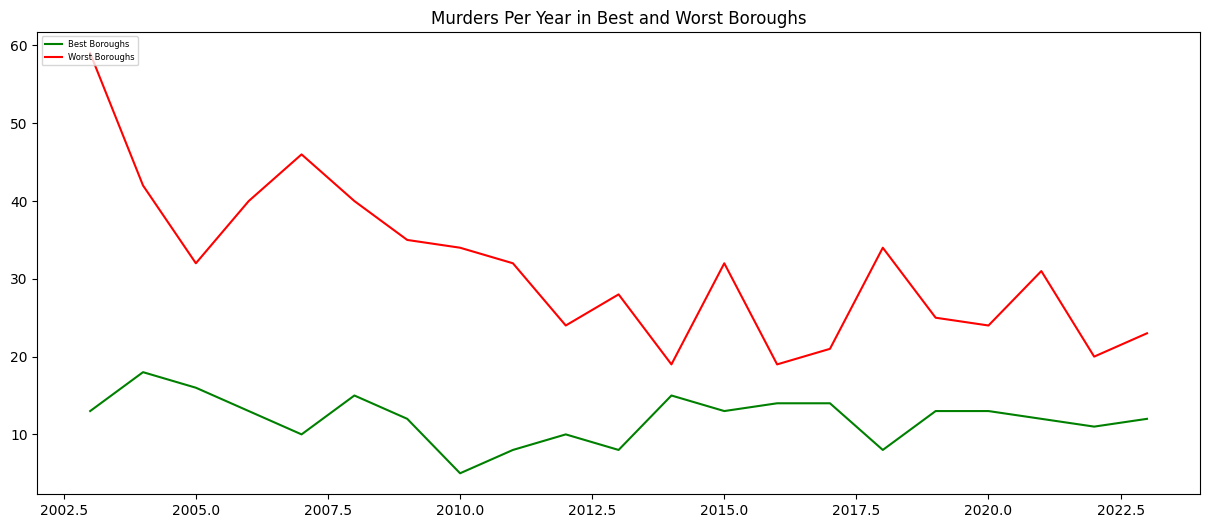

In [7]:
# Plot the combined data
fig = plt.figure(figsize=(15, 6))
plt.plot(df_homicide_combined[df_homicide_combined['Borough'] == 'Most trusting Boroughs']['Year'],
         df_homicide_combined[df_homicide_combined['Borough'] == 'Most trusting Boroughs']['Count'],
         label='Best Boroughs', color='green')
plt.plot(df_homicide_combined[df_homicide_combined['Borough'] == 'Least trusting Boroughs']['Year'],
            df_homicide_combined[df_homicide_combined['Borough'] == 'Least trusting Boroughs']['Count'],
            label='Worst Boroughs', color='red')
plt.title('Murders Per Year in Best and Worst Boroughs')
plt.legend(loc='upper left', prop={'size': 6})
plt.show()

In [8]:
df_homicide_age = df_homicide.groupby(['Borough', 'Method of Killing']).size().reset_index(name='Count')
df_homicide_best = df_homicide[df_homicide['Borough'].isin(best_boroughs)]
df_homicide_age_best = df_homicide_age[df_homicide_age["Borough"].isin(best_boroughs)].reset_index()
df_homicide_age_worst = df_homicide_age[df_homicide_age["Borough"].isin(worst_boroughs)].reset_index()
df_homicide_age_combined = pd.concat([df_homicide_age_best, df_homicide_age_worst])

df_homicide_age_combined

,index,Borough,Method of Killing,Count
0,12,Bexley,Blunt Implement,2
1,13,Bexley,Knife or Sharp Implement,20
2,14,Bexley,Not known/Not Recorded,6
3,15,Bexley,Other Methods of Killing,10
4,16,Bexley,"Physical Assault, no weapon",5
5,17,Bexley,Shooting,4
6,111,Kensington and Chelsea,Blunt Implement,5
7,112,Kensington and Chelsea,Knife or Sharp Implement,19
8,113,Kensington and Chelsea,Not known/Not Recorded,2
9,114,Kensington and Chelsea,Other Methods of Killing,6


In [9]:
df_homicide_age_total = df_homicide_age_combined.groupby('Borough').sum().reset_index()
df_homicide_age_total = df_homicide_age_total[['Borough', 'Count']]
df_homicide_age_total

,Borough,Count
0,Bexley,47
1,Hackney,129
2,Haringey,138
3,Islington,103
4,Kensington and Chelsea,41
5,Kingston upon Thames,33
6,Lambeth,178
7,Lewisham,112
8,Sutton,29
9,Westminster,103


In [10]:
df_homicide_age_final = pd.merge(df_homicide_age_combined, df_homicide_age_total, on='Borough')
df_homicide_age_final = df_homicide_age_final[['Borough', 'Method of Killing', 'Count_x', "Count_y"]]
df_homicide_age_final.columns = ['Borough', 'Method of Killing', 'Count in age group', 'Total in Borough']
df_homicide_age_final

,Borough,Method of Killing,Count in age group,Total in Borough
0,Bexley,Blunt Implement,2,47
1,Bexley,Knife or Sharp Implement,20,47
2,Bexley,Not known/Not Recorded,6,47
3,Bexley,Other Methods of Killing,10,47
4,Bexley,"Physical Assault, no weapon",5,47
5,Bexley,Shooting,4,47
6,Kensington and Chelsea,Blunt Implement,5,41
7,Kensington and Chelsea,Knife or Sharp Implement,19,41
8,Kensington and Chelsea,Not known/Not Recorded,2,41
9,Kensington and Chelsea,Other Methods of Killing,6,41


In [11]:
df_homicide_age_final['Percentage'] = df_homicide_age_final['Count in age group'] / df_homicide_age_final['Total in Borough'] * 100
df_homicide_age_final

,Borough,Method of Killing,Count in age group,Total in Borough,Percentage
0,Bexley,Blunt Implement,2,47,4.255319
1,Bexley,Knife or Sharp Implement,20,47,42.553191
2,Bexley,Not known/Not Recorded,6,47,12.765957
3,Bexley,Other Methods of Killing,10,47,21.276596
4,Bexley,"Physical Assault, no weapon",5,47,10.638298
5,Bexley,Shooting,4,47,8.510638
6,Kensington and Chelsea,Blunt Implement,5,41,12.195122
7,Kensington and Chelsea,Knife or Sharp Implement,19,41,46.341463
8,Kensington and Chelsea,Not known/Not Recorded,2,41,4.878049
9,Kensington and Chelsea,Other Methods of Killing,6,41,14.634146


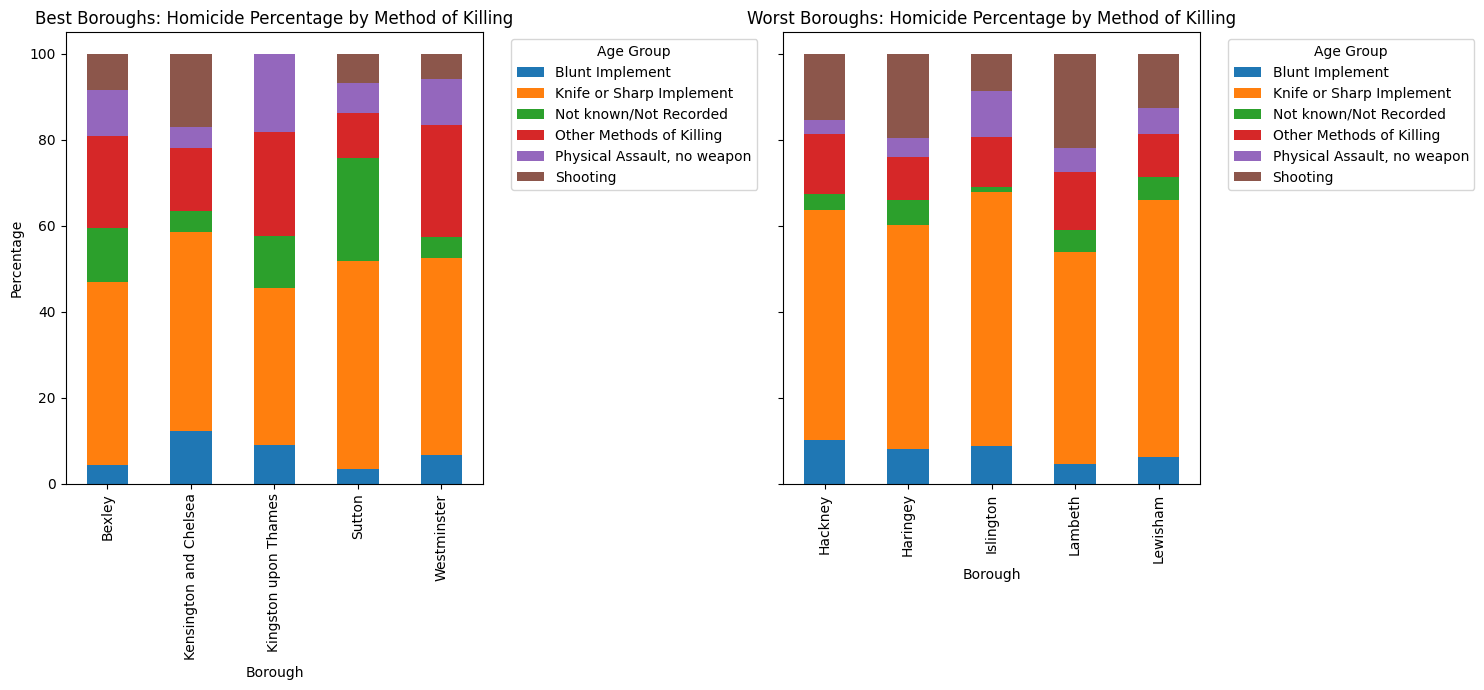

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter DataFrame for best and worst boroughs
df_best = df_homicide_age_final[df_homicide_age_final['Borough'].isin(best_boroughs)]
df_worst = df_homicide_age_final[df_homicide_age_final['Borough'].isin(worst_boroughs)]

# Create pivot tables for the stacked bar charts
pivot_best = df_best.pivot(index='Borough', columns='Method of Killing', values='Percentage')
pivot_worst = df_worst.pivot(index='Borough', columns='Method of Killing', values='Percentage')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# Plot the best boroughs
pivot_best.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Best Boroughs: Homicide Percentage by Method of Killing')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot the worst boroughs
pivot_worst.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Worst Boroughs: Homicide Percentage by Method of Killing')
axes[1].set_xlabel('Borough')

# Set the legend
axes[1].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plots
plt.show()


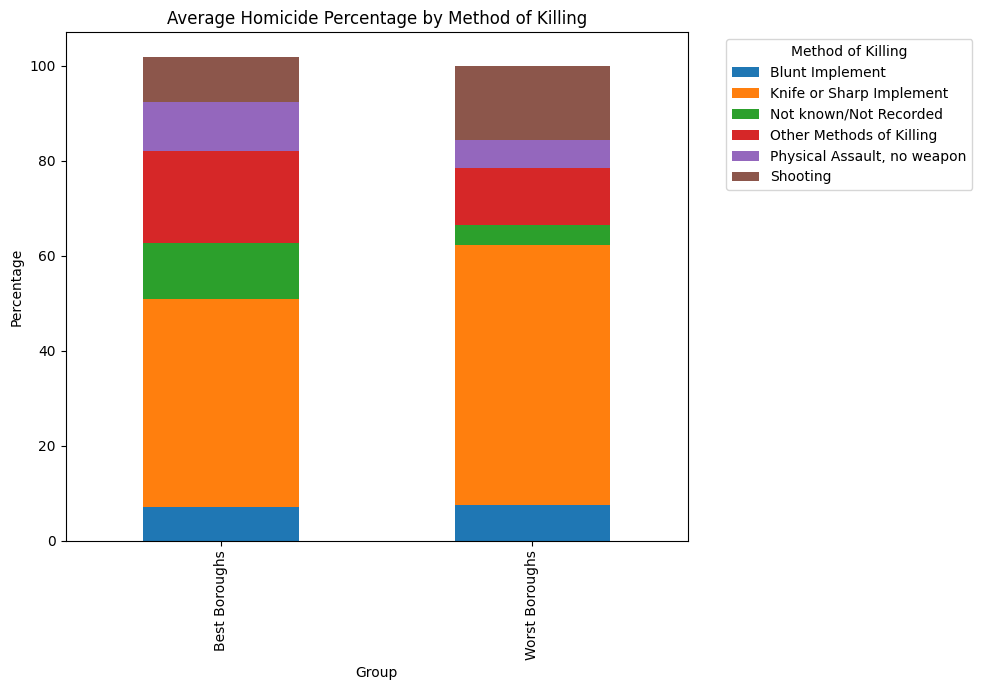

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter DataFrame for best and worst boroughs
df_best = df_homicide_age_final[df_homicide_age_final['Borough'].isin(best_boroughs)]
df_worst = df_homicide_age_final[df_homicide_age_final['Borough'].isin(worst_boroughs)]

# Create pivot tables for the stacked bar charts
pivot_best = df_best.pivot_table(index='Method of Killing', values='Percentage', aggfunc='mean').reset_index()
pivot_worst = df_worst.pivot_table(index='Method of Killing', values='Percentage', aggfunc='mean').reset_index()

# Combine the averages into a single DataFrame
pivot_best['Group'] = 'Best Boroughs'
pivot_worst['Group'] = 'Worst Boroughs'
combined_df = pd.concat([pivot_best, pivot_worst])

# Create a pivot table for plotting
plot_df = combined_df.pivot(index='Group', columns='Method of Killing', values='Percentage')

# Plot the stacked bar chart
plot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Average Homicide Percentage by Method of Killing')
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(title='Method of Killing', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [14]:
combined_df.to_csv('presentation_dataframes/homicide_method_of_killing.csv', index=False)